# Titanic Survival Prediction

### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Dataset
df_train = pd.read_csv(r"C:\Users\SONY\Desktop\projects of Machine Learning\Titanic Survoivor prediction\titanic_train.csv")
df_test = pd.read_csv(r"C:\Users\SONY\Desktop\projects of Machine Learning\Titanic Survoivor prediction\titanic_test.csv")

In [3]:
#Showing First Five row from Top
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Showing First Five row from Top
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#shape (rows,columns)
df_train.shape

(891, 12)

In [6]:
#shape
df_test.shape

(418, 11)

### Graphical Data Representation 

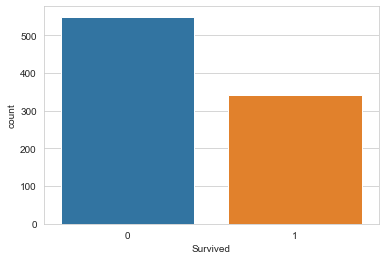

In [7]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=df_train)

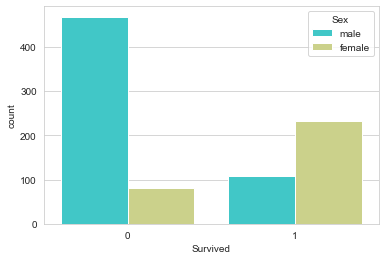

In [8]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue='Sex',data=df_train,palette='rainbow')

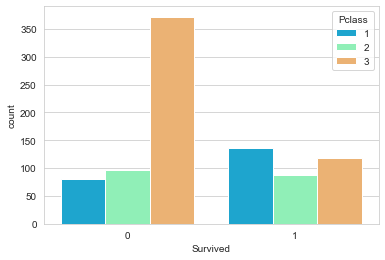

In [9]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue= 'Pclass',data=df_train,palette='rainbow')

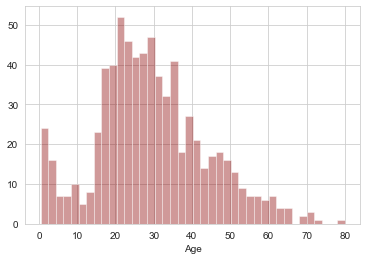

In [10]:
sns.distplot(df_train['Age'].dropna(),kde=False,color='darkred',bins=40) #dropna- dropping null values

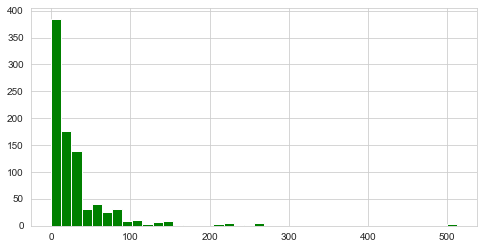

In [11]:
df_train['Fare'].hist(color='green',bins=40,figsize=(8,4))

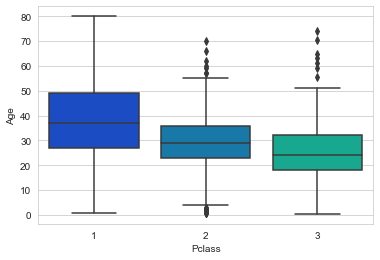

In [12]:
sns.boxplot(x='Pclass',y='Age',data=df_train,palette='winter')

### Missing Values

In [13]:
#showing missing values in columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
#showing missing values in columns
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [15]:
#If Null values content is less then better to remove this.
#if null values is more then better to place with other value like mean ,etc
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

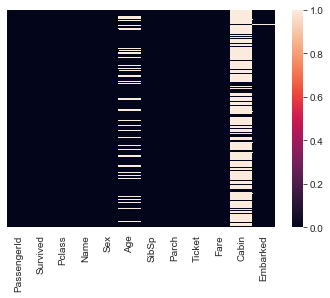

In [16]:
sns.heatmap(df_train.isnull(),yticklabels=False)

In [17]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

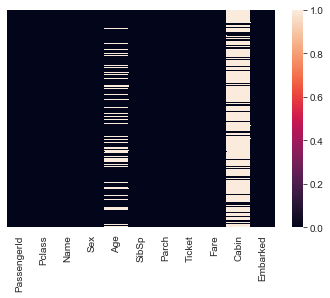

In [18]:
sns.heatmap(df_test.isnull(),yticklabels=False)

### Filling Data in Missing Values 

Text(0.5, 1, 'Corelation Matrix')

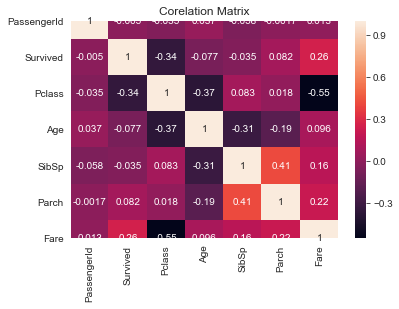

In [19]:
#relationship among dataset
sns.heatmap(df_train.corr(), annot=True)
plt.title('Corelation Matrix')

In [20]:
#relation is more in pclass and age so meadian of age used to fill null values
df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.groupby("Pclass").Age.transform('median')


#Same thing for test set
df_test.loc[df_test.Age.isnull(), 'Age'] = df_test.groupby("Pclass").Age.transform('median')

In [21]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
from statistics import mode

In [23]:
df_train['Embarked'] = df_train['Embarked'].fillna(mode(df_train['Embarked']))

#Applying the same technique for test set
df_test['Embarked'] = df_test['Embarked'].fillna(mode(df_test['Embarked']))

In [24]:
df_train['Fare']  = df_train.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))
df_test['Fare']  = df_test.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))

In [25]:
df_train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
E101           3
D              3
              ..
B30            1
B39            1
E49            1
D46            1
E10            1
Name: Cabin, Length: 147, dtype: int64

In [26]:
df_train['Cabin'] = df_train['Cabin'].fillna('U') #U= unknown
df_test['Cabin'] = df_test['Cabin'].fillna('U')

In [27]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [28]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [29]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [30]:
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,U,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,U,S


### Converting Categorical Features 

In [31]:
#finding numerical and categorical data
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df_train.dtypes[df_train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  7
Number of Categorical features:  5


In [32]:
#finding numerical and categorical data
numerical_feats = df_test.dtypes[df_test.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df_test.dtypes[df_test.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  6
Number of Categorical features:  5


In [33]:
#Numerical data and categorical data
print(df_train[numerical_feats].columns)
print(df_train[categorical_feats].columns)

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [34]:
print(df_test[numerical_feats].columns)
print(df_test[categorical_feats].columns)

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [35]:
df_train[numerical_feats].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [36]:
df_train[categorical_feats].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U,S


In [37]:
#converting categorical data in numerical as below
df_train.Sex.unique()

array(['male', 'female'], dtype=object)

In [38]:
df_train['Sex'][df_train['Sex'] == 'male'] = 0
df_train['Sex'][df_train['Sex'] == 'female'] = 1

df_test['Sex'][df_test['Sex'] == 'male'] = 0
df_test['Sex'][df_test['Sex'] == 'female'] = 1

In [39]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,S


In [40]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
temp = pd.DataFrame(encoder.fit_transform(df_train[['Embarked']]).toarray(), columns=['C', 'S', 'Q'])
df_train = df_train.join(temp)
df_train.drop(columns='Embarked', inplace=True)

temp = pd.DataFrame(encoder.fit_transform(df_test[['Embarked']]).toarray(), columns=['C', 'S', 'Q'])
df_test = df_test.join(temp)
df_test.drop(columns='Embarked', inplace=True)

In [41]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'C', 'S', 'Q'],
      dtype='object')

In [42]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,S,Q
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,0.0,0.0,1.0


In [43]:
df_train.Cabin.tolist()[0:30]

['U',
 'C85',
 'U',
 'C123',
 'U',
 'U',
 'E46',
 'U',
 'U',
 'U',
 'G6',
 'C103',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D56',
 'U',
 'A6',
 'U',
 'U',
 'U',
 'C23 C25 C27',
 'U',
 'U']

In [44]:
import re
df_train['Cabin'] = df_train['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())
df_test['Cabin'] = df_test['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())

In [45]:
df_train.Cabin.unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [46]:
cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':9}
df_train['Cabin'] = df_train['Cabin'].map(cabin_category)
df_test['Cabin'] = df_test['Cabin'].map(cabin_category)

In [47]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,S,Q
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,9,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,3,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,9,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,3,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,9,0.0,0.0,1.0


In [48]:
df_train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [49]:
df_train['Name'] = df_train.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
df_test['Name'] = df_test.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

In [50]:
df_train['Name'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

In [51]:
df_train.rename(columns={'Name' : 'Title'}, inplace=True)

df_train['Title'] = df_train['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')
                                      
df_test.rename(columns={'Name' : 'Title'}, inplace=True)
df_test['Title'] = df_test['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

In [52]:
df_train['Title'].value_counts(normalize = True) * 100

Mr        58.024691
Miss      20.426487
Mrs       14.029181
Master     4.489338
Other      3.030303
Name: Title, dtype: float64

In [53]:
df_train.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,S,Q
0,1,0,3,Mr,0,22.0,1,0,A/5 21171,7.2500,9,0.0,0.0,1.0
1,2,1,1,Mrs,1,38.0,1,0,PC 17599,71.2833,3,1.0,0.0,0.0
2,3,1,3,Miss,1,26.0,0,0,STON/O2. 3101282,7.9250,9,0.0,0.0,1.0
3,4,1,1,Mrs,1,35.0,1,0,113803,53.1000,3,0.0,0.0,1.0
4,5,0,3,Mr,0,35.0,0,0,373450,8.0500,9,0.0,0.0,1.0


In [54]:
encoder = OneHotEncoder()
temp = pd.DataFrame(encoder.fit_transform(df_train[['Title']]).toarray())
df_train = df_train.join(temp)
df_train.drop(columns='Title', inplace=True)

temp = pd.DataFrame(encoder.fit_transform(df_test[['Title']]).toarray())
df_test = df_test.join(temp)
df_test.drop(columns='Title', inplace=True)

In [55]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,S,Q,0,1,2,3,4
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,4,1,1,1,35.0,1,0,113803,53.1000,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,5,0,3,0,35.0,0,0,373450,8.0500,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [56]:
df_train['familySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['familySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [57]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,S,Q,0,1,2,3,4,familySize
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
4,5,0,3,0,35.0,0,0,373450,8.0500,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


In [58]:
# Drop redundant features
df_train = df_train.drop(['SibSp', 'Parch', 'Ticket'], axis = 1)
df_test = df_test.drop(['SibSp', 'Parch', 'Ticket'], axis = 1)

In [70]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,C,S,Q,0,1,2,3,4,familySize
0,1,0,3,0,22.0,7.2500,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
1,2,1,1,1,38.0,71.2833,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
2,3,1,3,1,26.0,7.9250,9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
3,4,1,1,1,35.0,53.1000,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
4,5,0,3,0,35.0,8.0500,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


In [72]:
X_train = df_train.drop(['PassengerId','Survived'], axis=1)
y_train = df_train['Survived']
X_test = df_test.drop("PassengerId", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 14), (891,), (418, 14))

In [73]:
X_train

,Pclass,Sex,Age,Fare,Cabin,C,S,Q,0,1,2,3,4,familySize
0,3,0,22.0,7.2500,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
1,1,1,38.0,71.2833,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
2,3,1,26.0,7.9250,9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
3,1,1,35.0,53.1000,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
4,3,0,35.0,8.0500,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,13.0000,9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
887,1,1,19.0,30.0000,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
888,3,1,24.0,23.4500,9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4
889,1,0,26.0,30.0000,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [74]:
X_train.shape

(891, 14)

In [75]:
X_test.head()

,Pclass,Sex,Age,Fare,Cabin,C,S,Q,0,1,2,3,4,familySize
0,3,0,34.5,7.8292,9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,3,1,47.0,7.0000,9,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
2,2,0,62.0,9.6875,9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,3,0,27.0,8.6625,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
4,3,1,22.0,12.2875,9,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3


In [76]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Model Evaluation

In [77]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

### Logistic Regression 

In [78]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred_log = log_reg.predict(X_test)
acc_log_reg = round( log_reg.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' percent')

83.39 percent


### Linear SVC 

In [79]:
svc = LinearSVC()
svc.fit(X_train,y_train)
y_pred_linSVC = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
print (str(acc_svc) + ' percent')

69.58 percent


### Support  Vector Machines

In [80]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = round(svm.score(X_train, y_train) * 100, 2)
print(str(acc_svm) + 'percent')

89.67percent


### KNN 

In [81]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(str(acc_knn) + 'percent')

83.95percent


###  Decision Tree

In [82]:
des_tree = DecisionTreeClassifier()
des_tree.fit(X_train, y_train)
y_pred_decision_tree = des_tree.predict(X_test)
acc_decision_tree = round(des_tree.score(X_train, y_train) * 100, 2)
print(str(acc_decision_tree) + 'percent')

98.77percent


### Random Forest 

In [83]:
Ran_For = RandomForestClassifier(n_estimators=100)
Ran_For.fit(X_train, y_train)
y_pred_random_forest = Ran_For.predict(X_test)
acc_random_forest = round(Ran_For.score(X_train, y_train) * 100, 2)
print(str(acc_random_forest) + 'percent') 

98.77percent


### Naive Bayes 

In [84]:
gn = GaussianNB()
gn.fit(X_train, y_train)
y_pred_gnb = gn.predict(X_test)
acc_gnb = round(gn.score(X_train, y_train) * 100, 2)
print(str(acc_gnb) + 'percent')

78.9percent


### Comparing Models

In [85]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Linear SVC','Support Vector Machines',
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes'],
    
    'Score': [acc_log_reg, acc_svc, acc_svm, acc_knn, acc_decision_tree, acc_random_forest, acc_gnb]
    })

In [86]:
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,98.77
5,Random Forest,98.77
2,Support Vector Machines,89.67
3,KNN,83.95
0,Logistic Regression,83.39
6,Naive Bayes,78.90
1,Linear SVC,69.58


In [87]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": y_pred_decision_tree})

In [88]:
submission.to_csv("Submission csv")